In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!gdown --id 1oHkxL4JY54kvpeZnt2Qq4_kxKgZK9R9z

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oHkxL4JY54kvpeZnt2Qq4_kxKgZK9R9z
To: /content/focus.csv
100% 234k/234k [00:00<00:00, 111MB/s]


In [3]:
df=pd.read_csv('/content/focus.csv')

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6


In [5]:
df.corr()

,year,price,mileage,engineSize
year,1.000000,0.761746,-0.808609,-0.184722
price,0.761746,1.000000,-0.741632,0.255457
mileage,-0.808609,-0.741632,1.000000,0.164202
engineSize,-0.184722,0.255457,0.164202,1.000000


In [8]:
col_name=['model', 'year',  'transmission', 'mileage', 'fuelType',
       'engineSize','price']

In [11]:
df=df[col_name]

In [12]:
df.head()

,model,year,transmission,mileage,fuelType,engineSize,price
0,Focus,2016,Manual,38852,Petrol,1.0,8000
1,Focus,2019,Manual,11952,Petrol,1.0,13400
2,Focus,2019,Manual,22142,Petrol,1.5,14600
3,Focus,2016,Manual,14549,Diesel,1.6,9450
4,Focus,2015,Manual,7010,Diesel,1.6,9999


In [25]:
df.describe()

,year,mileage,engineSize,price
count,5454.000000,5454.000000,5454.000000,5454.000000
mean,2017.113495,22876.582692,1.363256,13581.958379
std,2.170301,20596.754387,0.400233,4737.282779
min,2002.000000,1.000000,0.000000,495.000000
25%,2016.000000,9137.000000,1.000000,10489.250000
50%,2017.000000,15944.500000,1.500000,13299.500000
75%,2019.000000,30000.000000,1.600000,16987.250000
max,2020.000000,177644.000000,2.500000,54995.000000


In [26]:
df.isnull().sum()

model           0
year            0
transmission    0
mileage         0
fuelType        0
engineSize      0
price           0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


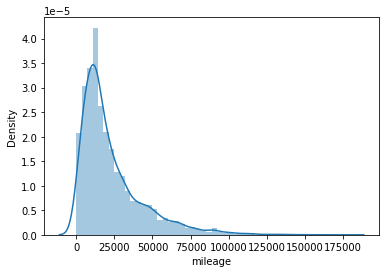

In [30]:
sns.distplot(df['mileage'])

In [34]:
max_thresold=df['mileage'].quantile(0.99)
min_thresold,max_thresold

(201.0, 95339.81000000019)

In [36]:
df1=df[(df['mileage']<max_thresold)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


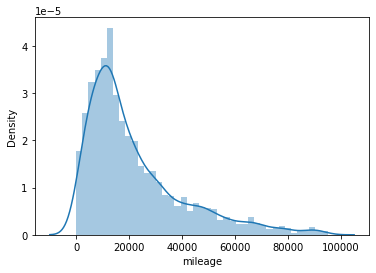

In [38]:
sns.distplot(df1['mileage'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


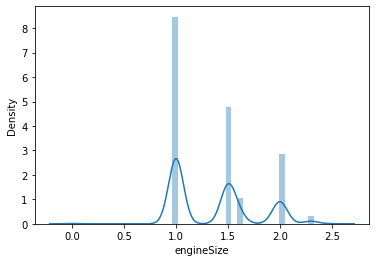

In [39]:
sns.distplot(df1['engineSize'])

In [56]:
min_thresold=df1['engineSize'].quantile(0.001)
max_thresold=df1['engineSize'].quantile(0.99)
min_thresold,max_thresold

(0.0, 2.3)

In [57]:
df2=df1[(df1['engineSize']>min_thresold)&(df1['engineSize']<max_thresold)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


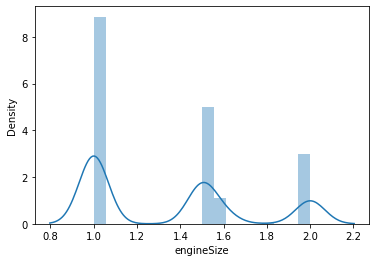

In [58]:
sns.distplot(df2['engineSize'])

In [59]:
df=df2.copy()

In [61]:
df.duplicated().sum()

669

In [68]:
df.drop(['model','year'],axis=1,inplace=True)

In [69]:
df

,transmission,mileage,fuelType,engineSize,price
0,Manual,38852,Petrol,1.0,8000
1,Manual,11952,Petrol,1.0,13400
2,Manual,22142,Petrol,1.5,14600
3,Manual,14549,Diesel,1.6,9450
4,Manual,7010,Diesel,1.6,9999
...,...,...,...,...,...
5449,Manual,7855,Diesel,2.0,18745
5450,Manual,13891,Petrol,1.0,16350
5451,Manual,13452,Petrol,1.0,16850
5452,Automatic,13376,Petrol,1.0,17310


In [91]:
x=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [92]:
x

,transmission,mileage,fuelType,engineSize
0,Manual,38852,Petrol,1.0
1,Manual,11952,Petrol,1.0
2,Manual,22142,Petrol,1.5
3,Manual,14549,Diesel,1.6
4,Manual,7010,Diesel,1.6
...,...,...,...,...
5449,Manual,7855,Diesel,2.0
5450,Manual,13891,Petrol,1.0
5451,Manual,13452,Petrol,1.0
5452,Automatic,13376,Petrol,1.0


In [93]:
Y

0        8000
1       13400
2       14600
3        9450
4        9999
        ...  
5449    18745
5450    16350
5451    16850
5452    17310
5453    17610
Name: price, Length: 5279, dtype: int64

In [98]:
y=pd.DataFrame(data=Y)

In [99]:
y

,price
0,8000
1,13400
2,14600
3,9450
4,9999
...,...
5449,18745
5450,16350
5451,16850
5452,17310


In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df[('transmission')] = le.fit_transform(df['transmission'])

In [24]:
x.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,2])],remainder='passthrough')
x=ct.fit_transform(x)

In [101]:
x

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 3.8852e+04,
        1.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.1952e+04,
        1.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.2142e+04,
        1.5000e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.3452e+04,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.3376e+04,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 7.8860e+03,
        1.0000e+00]])

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
model=LinearRegression()

In [107]:
model.fit(x_train,y_train)

LinearRegression()

In [108]:
prediction = model.predict(x_test)

In [109]:
model.score(x_test,y_test)

0.7197850361452498

In [110]:
def accuracy(y_test,prediction):
  accuracy=(1-np.abs(((np.abs(y_test)-np.abs(prediction))/np.abs(y_test))))*100
  return np.average(accuracy)

In [111]:
accuracy(y_test,prediction)

84.95789056724038

In [112]:
prediction

array([[17084.1163868 ],
       [ 8358.43408593],
       [13649.084436  ],
       ...,
       [16486.04682544],
       [ 9423.23574037],
       [16402.97518185]])

In [119]:
pre_acut=pd.DataFrame([prediction,y_test],columns=['Prediction','Acutal Price'])

ValueError: ignored

In [114]:
pre_acut

,Prediction
0,17084.116387
1,8358.434086
2,13649.084436
3,14377.759974
4,13670.640704
...,...
1579,12583.246765
1580,11990.910012
1581,16486.046825
1582,9423.235740


In [116]:
pre_acut['Acctual Price']=y_test

In [117]:
pre_acut

,Prediction,Acctual Price
0,17084.116387,NaN
1,8358.434086,NaN
2,13649.084436,NaN
3,14377.759974,NaN
4,13670.640704,NaN
...,...,...
1579,12583.246765,NaN
1580,11990.910012,8391.0
1581,16486.046825,NaN
1582,9423.235740,NaN


In [120]:
len(y_test)

1584

In [121]:
len(y_train)

3695

In [122]:
len(prediction)

1584